In [46]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install graphviz

import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
plt.rcParams['figure.figsize'] = [20, 20]

In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid_19_india.csv to covid_19_india (1).csv
User uploaded file "covid_19_india.csv" with length 436558 bytes


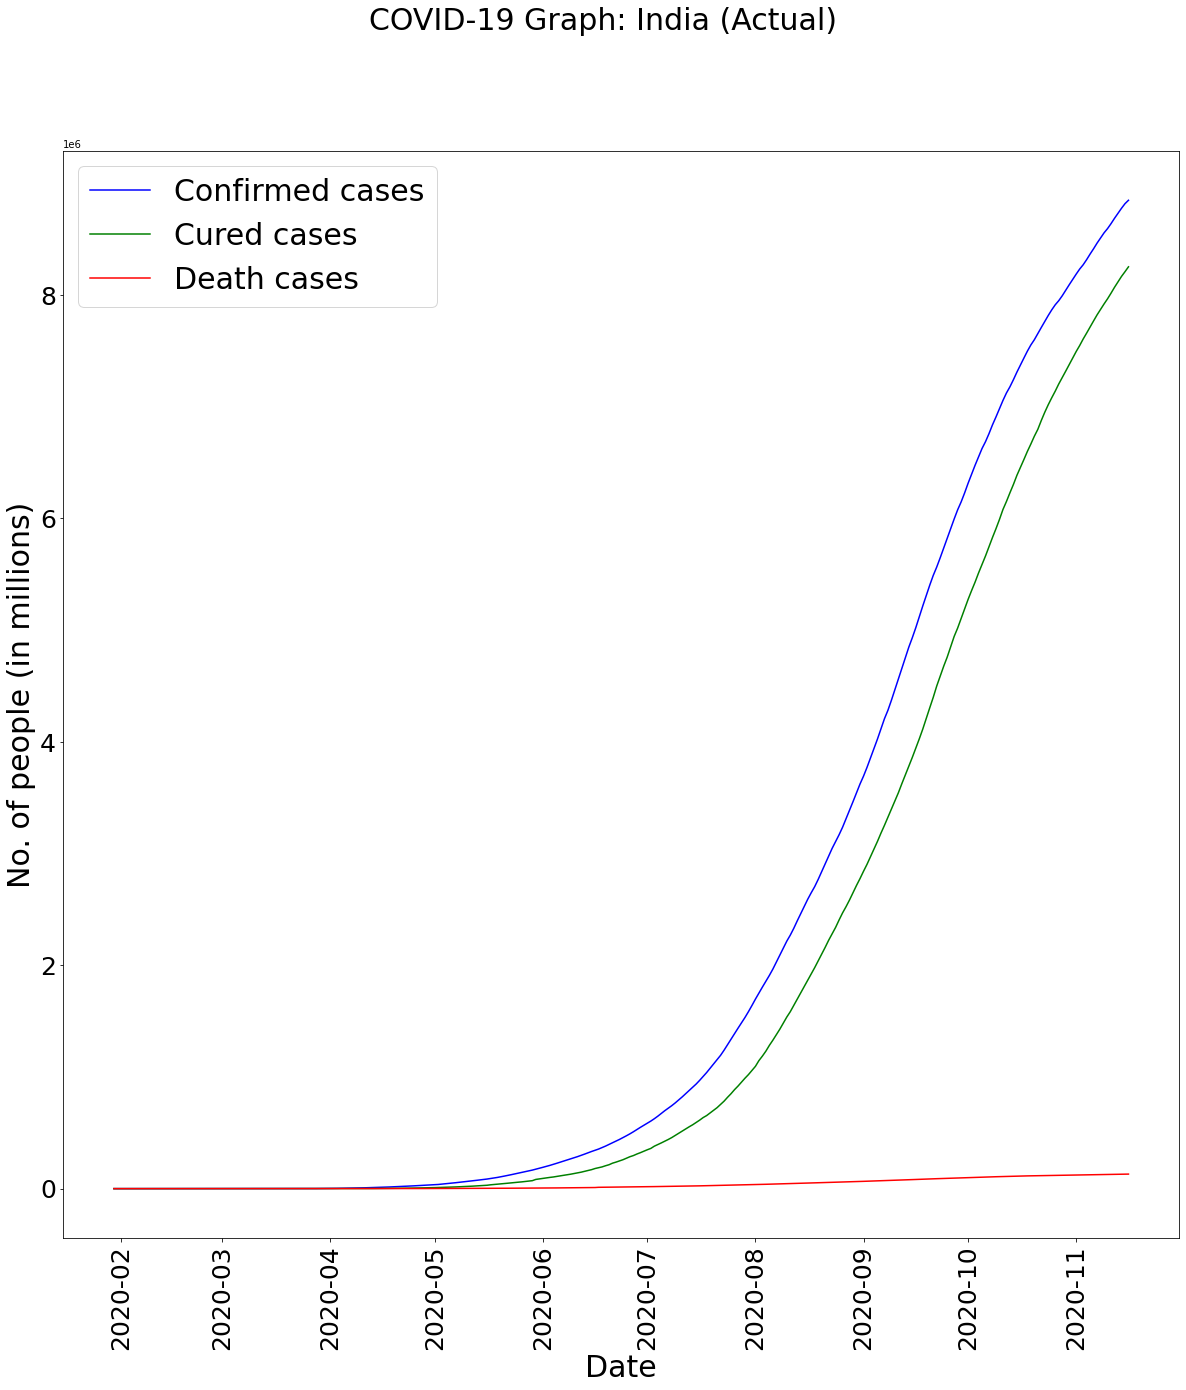

In [54]:
import datetime as dt
import math

columnsTitles1 = ['Date','Cured', 'Predicted_Cured']
df_temp1 = covid19_data.reindex(columns=columnsTitles1)
df_temp1.Date = df_temp1.Date.apply( lambda x: dt.datetime.strptime(x, '%d/%m/%y').date())
df_temp1.index = df_temp1.Date # Set the Date column as your index

del df_temp1['Date'] # Remove the Date column from your data columns
df_temp1 = df_temp1.groupby(['Date'], as_index=True).sum()

columnsTitles2 = ['Date','Deaths', 'Predicted_Deaths', 'Diff']
df_temp2 = covid19_data.reindex(columns=columnsTitles2)
df_temp2.Date = df_temp2.Date.apply( lambda x: dt.datetime.strptime(x, '%d/%m/%y').date())
df_temp2.index = df_temp2.Date # Set the Date column as your index

del df_temp2['Date'] # Remove the Date column from your data columns
df_temp2 = df_temp2.groupby(['Date'], as_index=True).sum()

columnsTitles3 = ['Date', 'Confirmed', 'Predicted_Confirmed']
df_temp3 = covid19_data.reindex(columns=columnsTitles3)
df_temp3.Date = df_temp3.Date.apply( lambda x: dt.datetime.strptime(x, '%d/%m/%y').date())
df_temp3.index = df_temp3.Date # Set the Date column as your index

del df_temp3['Date'] # Remove the Date column from your data columns
df_temp3 = df_temp3.groupby(['Date'], as_index=True).sum()

fig, ax = plt.subplots()


ax.plot_date(df_temp3.index, df_temp3['Confirmed'], linestyle='solid', fmt='-', color='b', label = 'Confirmed cases', markersize = 20)
ax.plot_date(df_temp1.index, df_temp1['Cured'], linestyle='solid', fmt='-', color='g', label = 'Cured cases', markersize = 20)
ax.plot_date(df_temp2.index, df_temp2['Deaths'], linestyle='solid', fmt='-', color='r', label = 'Death cases', markersize = 20)
ax.legend(loc='upper left',  prop={'size': 30})

fig.suptitle('COVID-19 Graph: India (Actual)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylabel('No. of people (in millions)', fontsize=30)

for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(25) 
  tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(25) 

plt.show()


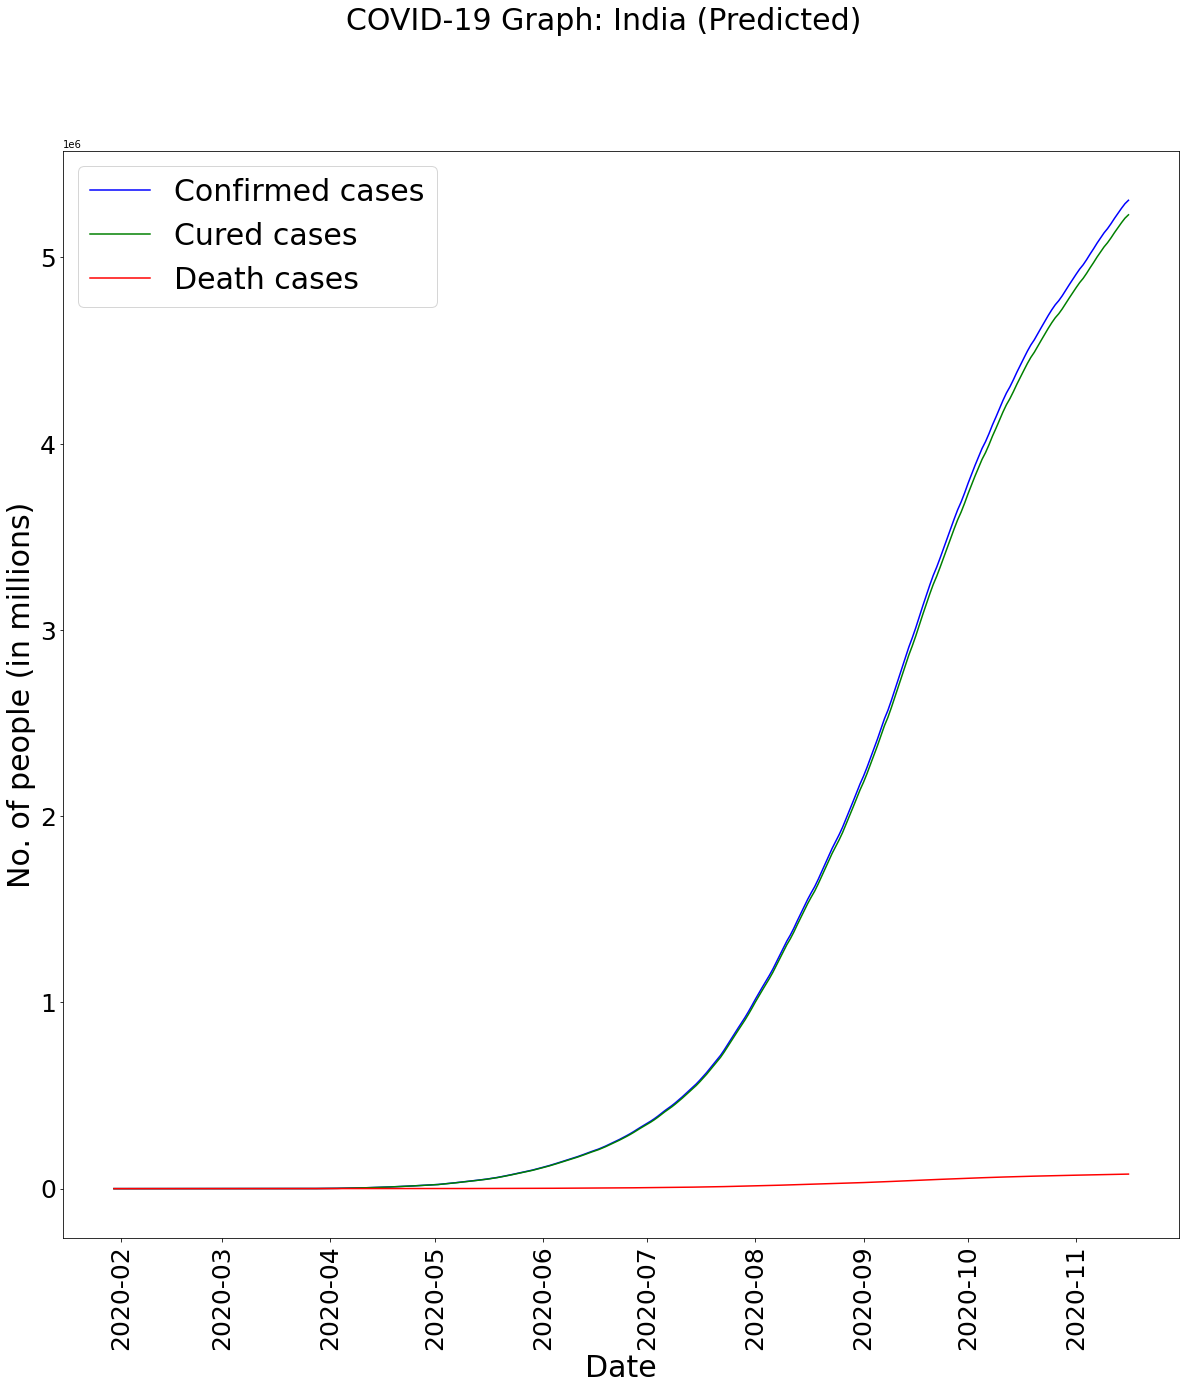

            Confirmed  Predicted_Confirmed
Date                                      
2020-11-12    8683916              5210350
2020-11-13    8728795              5237277
2020-11-14    8773479              5264088
2020-11-15    8814579              5288748
2020-11-16    8845127              5307077
            Deaths  Predicted_Deaths   Diff
Date                                       
2020-11-12  128121             76620  51501
2020-11-13  128668             77016  51652
2020-11-14  129188             77410  51778
2020-11-15  129635             77773  51862
2020-11-16  130070             78043  52027
              Cured  Predicted_Cured
Date                                
2020-11-12  8066501          5133730
2020-11-13  8115580          5160261
2020-11-14  8163572          5186678
2020-11-15  8205728          5210975
2020-11-16  8249579          5229034


In [53]:
fatality_rate = df_temp2['Deaths'][-1]/df_temp3['Confirmed'][-1]

df_temp3.Predicted_Confirmed = df_temp3.Confirmed * 0.6
df_temp3.Predicted_Confirmed = df_temp3.Predicted_Confirmed.apply( lambda x: math.ceil(x))

df_temp2.Predicted_Deaths = df_temp3.Predicted_Confirmed * fatality_rate
df_temp2.Predicted_Deaths = df_temp2.Predicted_Deaths.apply( lambda x: math.ceil(x))

df_temp1['Predicted_Cured'] = df_temp3.Predicted_Confirmed - df_temp2.Predicted_Deaths

fig, ax = plt.subplots()

ax.plot_date(df_temp3.index, df_temp3['Predicted_Confirmed'], linestyle='solid', fmt='-', color='b', label = 'Confirmed cases', markersize = 20)
ax.plot_date(df_temp1.index, df_temp1['Predicted_Cured'], linestyle='solid', fmt='-', color='g', label = 'Cured cases', markersize = 20)
ax.plot_date(df_temp2.index, df_temp2['Predicted_Deaths'], linestyle='solid', fmt='-', color='r', label = 'Death cases', markersize = 20)

ax.legend(loc='upper left',  prop={'size': 30})

fig.suptitle('COVID-19 Graph: India (Predicted)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylabel('No. of people (in millions)', fontsize=30)

for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(25) 
  tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(25) 

plt.show()

df_temp2.Diff = df_temp2['Deaths'] - df_temp2['Predicted_Deaths']
print(df_temp3.tail())
print(df_temp2.tail())
print(df_temp1.tail())
